# CMSC 478-ML Homework 5
## By: Pravar Kochar

In [1]:
import matplotlib.pyplot as plot

# Include the self made Data class.
from HW5_functions import Flower, KMeans, PCA, plot_line, Car_class

# Constants to work on input data correctly.
LINEAR_REGRESSION = False
LOGISTIC_REGRESSION = True

def LOOCV(data, lambda_parameter=None):
    # Simulate the LOOCV method.
    data_est_lst = []
    for leave_idx in range(data.data_count):
        idx_minus_data_theta = data.gradient_descent([leave_idx], lambda_param=lambda_parameter)
        est_data_test = data.resp_pred_test_data(idx_minus_data_theta, [leave_idx])[0]
        data_est_lst.append(est_data_test)
    return data_est_lst

def LOOCVNE(data, lambda_parameter=None):
    # Simulate the LOOCVNE method.
    data_est_lst = []
    for leave_idx in range(data.data_count):
        idx_minus_data_theta = data.normal_equation([leave_idx], lambda_param=lambda_parameter)
        est_data_test = data.resp_pred_test_data(idx_minus_data_theta, [leave_idx])[0]
        data_est_lst.append(est_data_test)
    return data_est_lst

def scatter_plot_reduced_PCA(red_dt, resp_types: list, title_add=''):
    # inbuilt 5 variants.
    special_symbols = [
        ('*', 'r'),
        ('o', 'g'),
        (',', 'b'),
        ('d', 'c'),
        ('v', 'm')
    ]
    add_lgnd = [True for _ in range(len(resp_types))]

    # red_dt[j][data (1 for point, 0 for response)]
    x = [red_dt[dt_idx][1][0] for dt_idx in range(len(red_dt))]
    y = [red_dt[dt_idx][1][1] for dt_idx in range(len(red_dt))]
    resp = [red_dt[dt_idx][0] for dt_idx in range(len(red_dt))]

    for i in range(len(red_dt)):
        x_i = x[i]
        y_i = y[i]
        resp_i = resp[i]

        plot_symb = None
        for resp_idx in range(len(resp_types)):
            if resp_i == resp_types[resp_idx]:
                plot_symb = special_symbols[resp_idx]

                # Add only 1 legend entry.
                if add_lgnd[resp_idx] is True:
                    plot.scatter([], [], marker=plot_symb[0], color=plot_symb[1], label=resp_i)
                    add_lgnd[resp_idx] = False

        plot.scatter(x_i, y_i, marker=plot_symb[0], color=plot_symb[1])

    plot.title("Reduced PCA plot " + title_add)
    plot.xlabel('Reduced feature 1')
    plot.ylabel('Reduced feature 2')
    plot.legend()
    plot.grid()
    plot.show()


## Question 1

---
__Question 1__. Consider the dataset flowers.csv (same as Homework 3) which has observations for 150 different flowers
on Species and 4 other features, viz., SepalLength, SepalWidth, PetalLength, and PetalWidth (each in centimeters)
affecting Species. A flower can be of either of the three Species, viz., setosa, versicolor, and virginica.
Perform the following tasks.

---

In [2]:
fl = Flower('flowers.csv')

---
__Question 1a__. Split the given dataset into training and test data as follows. For every species, select the first 80% of
the observations in the training data, and the rest in the test data.

---

In [3]:
fl.break_to_training_test()

---
__Question 1b__. Scale the features in the training data using mean normalization. Furthermore, using the means and
variances of different features in the training data, scale the features in the test data.

---

In [4]:
fl.scale_ft_train_test()

---
__Question 1c__. Using only the scaled features, cluster the flowers in the training data into 3 clusters using the k-means
clustering algorithm.
Plot distortion vs run.
Report the response versus cluster assignment matrix and the centroids of the three clusters
How compared to confusion matrix from HW3 q4d.

---

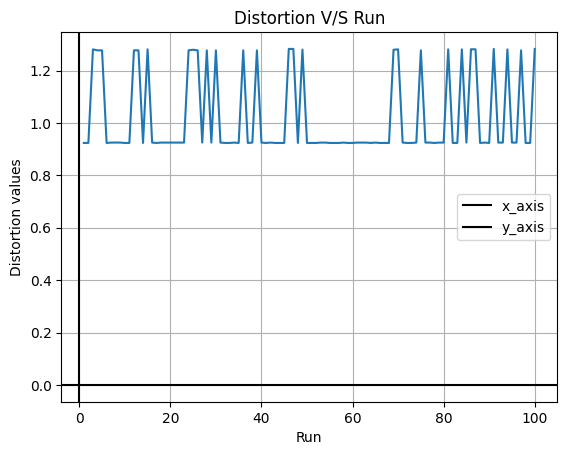

			train data Response V/S Cluster assignment matrix
+----------------------------------+-------------+-------------+-------------+
| Observation\Prediction Cluster   |  Cluster 1  |  Cluster 2  |  Cluster 3  |
+==================================+=============+=============+=============+
| Observed Setosa train data       |      0      |     40      |      0      |
| Observed Versicolor train data   |     12      |      0      |     28      |
| Observed Virginica train data    |     29      |      0      |     11      |
+----------------------------------+-------------+-------------+-------------+
Centroid #1: [1.0803, 0.0369, 0.9544, 0.9406]
Centroid #2: [-1.012, 0.8772, -1.307, -1.2704]
Centroid #3: [-0.0977, -0.9385, 0.3372, 0.3141]


In [5]:
# Run KMeans with 3 clusters.
km = KMeans(fl.m_train, 3)

# Plot distortion vs run.
km.plot_distortion_vs_run()

# Report matrix and centroids.
cluster = km.get_clusters_of_final()
centroids_lst = km.m_final_centroids
fl.print_response_vs_assignment_matrix(cluster, "train data")
km.print_centroids()

'Response V/S cluster assignment' V/S 'Confusion matrix': The cluster assignment matrix is purly
example specific, cluster assignment is done on unlabeled data and the observation would not be
known.
On the other hand the confusion matrix is made after running GDA on a labeled data set, so the
algorithm knows the labels of the training data.

Due to such differences, in the confusion matrix it is seen that the predicted labels are prone
to problems of over-fitting from GDA, albeit they classify the flower as a particular species.
While the Cluster algo. classifies 'similar' data into k clusters, k is dependent on user's
choice and using 3 it is seen the clusters mostly hold the majority of one flower type when
compared to conf. matrix.

Also note the order of clusters can be random based on random initialization of clusters,
hence first cluster could hold majority of Virginica instead of Setosa, etc.

---
__Question 1d__. Using the cluster centroids learned in 1c assign each flower in the test data to one of the three clusters.
Report the response versus cluster assignment matrix. How does this response versus cluster assignment
matrix compare to the confusion matrix for test data as obtained in 4e on Homework 3?

---

In [6]:
# Do same on test data.
km = KMeans(fl.m_test, centroids=centroids_lst)
cluster = km.get_clusters_of_final()
fl.print_response_vs_assignment_matrix(cluster, "test data")
km.print_centroids()

# km is ques1 specific.
del km

			test data Response V/S Cluster assignment matrix
+----------------------------------+-------------+-------------+-------------+
| Observation\Prediction Cluster   |  Cluster 1  |  Cluster 2  |  Cluster 3  |
+==================================+=============+=============+=============+
| Observed Setosa test data        |      0      |     10      |      0      |
| Observed Versicolor test data    |      0      |      0      |     10      |
| Observed Virginica test data     |      7      |      0      |      3      |
+----------------------------------+-------------+-------------+-------------+
Centroid #1: [1.0803, 0.0369, 0.9544, 0.9406]
Centroid #2: [-1.012, 0.8772, -1.307, -1.2704]
Centroid #3: [-0.0977, -0.9385, 0.3372, 0.3141]


Compared to the test confusion matrix the cluster assignment on test data seems to be more
accurately assigning the similar species flowers to same clusters.
While the GDA (conf. matrix) has a lot more miss-classification of the flowers than Cluster Assign.

## Question 2

---
__Question 2__. Consider the scaled training data obtained in 1. Perform the following tasks.

---

---
__Question 2a__. Using only the scaled features, cluster the flowers in the training data into k clusters using the k-means
clustering algorithm for k = 1, 2, 3, 4, 5. Calculate the distortion of clustering for each value of k.
Plot the distortion values against k and decide what should be the optimum number of clusters. To
avoid the effect of the choices of initial centroids, employ the same remedy as discussed in 1c for every k.
Refer to the Elbow Method from the lecture notes

---

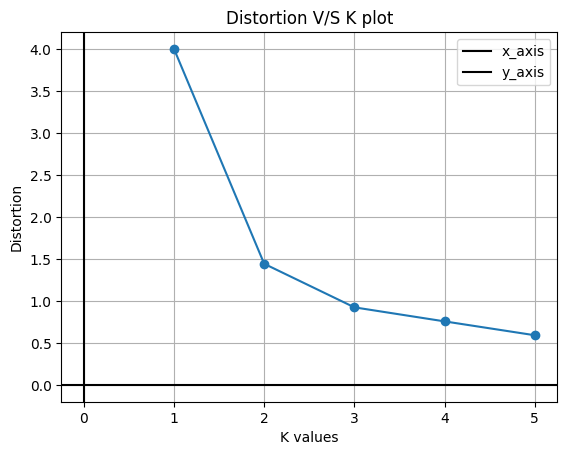

In [7]:
k_lst = [1, 2, 3, 4, 5]
distortion_lst = []
km = None

for k in k_lst:
    # Run KMeans with k clusters.
    km = KMeans(fl.m_train, k)
    distortion_lst.append(km.get_min_distortion())
# Plot dist vs k.
plot_line(k_lst, distortion_lst, "Distortion V/S K plot", "K values", "Distortion", 'o-')

del km, k_lst, distortion_lst

The distortion values drop from after 3 seems to be less than ~0.25, thus,
using the Elbow Method it can be determined the best K value to be 3 (or maybe 2 if need be).

## Question 3

---
__Question 3__. Consider the scaled training and test data obtained in 1. Perform the following tasks

---

---
__Question 3a__. For each flower in the training data, transform the 4-dimensional feature vector into a 2-dimensional
vector using the principal components analysis algorithm. Report the matrix of the first 2 principal
components. The matrix of first k principal components is nothing but the matrix formed using the first
k eigenvectors of the sample covariance matrix as its columns. Refer to the lecture notes for the formal
definition. You may use linalg.eig and linalg.eigh functions available under the numpy package in
Python

---

In [8]:
k = 2   # The number of k to be reduced to.
# PCA to k-dim data.
PCA_train = PCA(fl.m_train, k)
# Save the reduced data.
reduced_train_data, reduce_matrix = PCA_train.PCA_return()
# Report the principle components.
PCA_train.print_PC()

PCA: Data already scaled. (No additional scaling done)
Principle Component #1: [0.5141, -0.4024, -0.7127, 0.2568]
Principle Component #2: [-0.2893, -0.9124, 0.2623, -0.1226]


---
__Question 3b__. For the training data, visualize the flowers in the transformed features space, i.e. make a scatter plot of
the transformed features for all flowers and label the species using different colors.

---

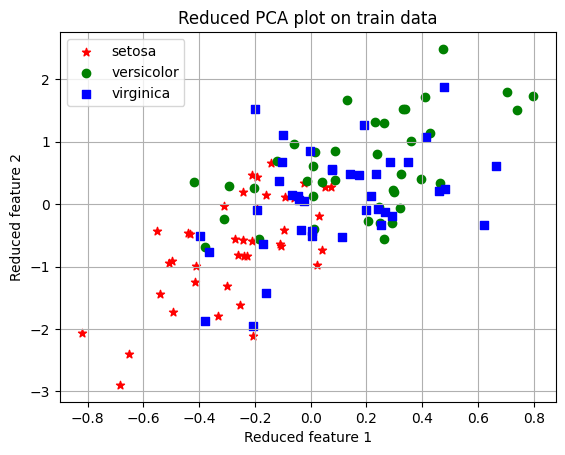

In [9]:
# Plot the training data.
scatter_plot_reduced_PCA(reduced_train_data, list(fl.get_species().keys()), title_add='on train data')

---
__Question 3c__. Using the matrix of the first 2 principal components, for each flower in the test data, transform the
4-dimensional feature vector into a 2-dimensional vector. For the test data, visualize the flowers in the
transformed features space, i.e. make a scatter plot of the transformed features for all the flowers and
label the species using different colors.

---

PCA: Data already scaled. (No additional scaling done)


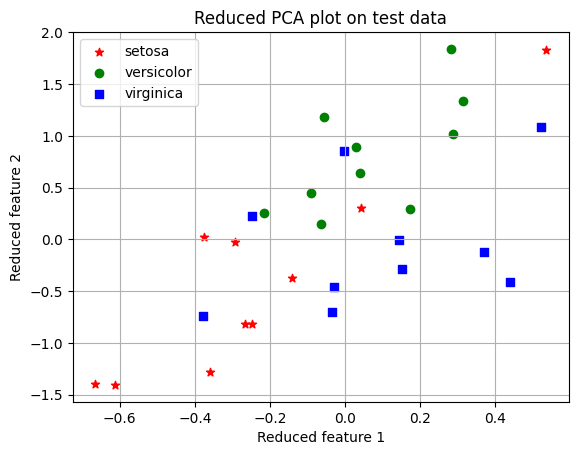

In [10]:
# The mean variance list of the train data.
PCA_test = PCA(fl.m_test, k, mv_lst=fl.get_train_mv_list(), U_reduced_mat=reduce_matrix)
reduced_test_data = PCA_test.get_reduced_data()

# Plot the test data.
scatter_plot_reduced_PCA(reduced_test_data, list(fl.get_species().keys()), title_add='on test data')

del reduce_matrix, PCA_test, PCA_train

## Question 4

---
__Question 4__. Consider the scaled and transformed training and test data obtained in 3. Perform the following tasks

---

In [11]:
# Use reduced_train_data, reduced_test_data

---
__Question 4a__. Using only the scaled and transformed features, cluster the flowers in the training data into 3 clusters
using the k-means clustering algorithm. To avoid the effect of the choices of initial centroids, employ the same remedy
as discussed in 1c. Report the response versus cluster assignment matrix and the centroids of the
three clusters. How does this response versus cluster assignment matrix compare to the same obtained in 1c?

---

In [12]:
# Run KMeans with 3 clusters, on PCAed data.
km_reduced = KMeans(reduced_train_data, 3)

# Report matrix and centroids.
cluster = km_reduced.get_clusters_of_final()
fl.print_response_vs_assignment_matrix(cluster, "train data")
km_reduced.print_centroids()

			train data Response V/S Cluster assignment matrix
+----------------------------------+-------------+-------------+-------------+
| Observation\Prediction Cluster   |  Cluster 1  |  Cluster 2  |  Cluster 3  |
+==================================+=============+=============+=============+
| Observed Setosa train data       |     13      |     26      |      1      |
| Observed Versicolor train data   |      0      |     20      |     20      |
| Observed Virginica train data    |      3      |     22      |     15      |
+----------------------------------+-------------+-------------+-------------+
Centroid #1: [-0.4289, -1.6692]
Centroid #2: [-0.0262, -0.1649]
Centroid #3: [0.2401, 1.0534]


How compared to 1c: A cluster seems to have a lot more varied data than 1c where a cluster has a
clear majority of a single species. This relates to the fact that when running PCA to get k (<n)
features some amount of data is lost (less significant but still part of the data).

Due to this it seems the cluster assignment isn't as accurate as with all 4 original features.

---
__Question 4b__. Using the cluster centroids learned in 4a, assign each flower in the test data to one of the three clusters.
Report the response versus cluster assignment matrix. How does this response versus cluster assignment
matrix compare to the test confusion matrix obtained in 1d?

---

In [13]:
# Run KMeans with 3 clusters, on PCAed data.
km_reduced = KMeans(reduced_test_data, 3)

# Report matrix and centroids.
cluster = km_reduced.get_clusters_of_final()
fl.print_response_vs_assignment_matrix(cluster, "train data")
km_reduced.print_centroids()

del reduced_train_data, reduced_test_data

			train data Response V/S Cluster assignment matrix
+----------------------------------+-------------+-------------+-------------+
| Observation\Prediction Cluster   |  Cluster 1  |  Cluster 2  |  Cluster 3  |
+==================================+=============+=============+=============+
| Observed Setosa train data       |      1      |      4      |      5      |
| Observed Versicolor train data   |      5      |      5      |      0      |
| Observed Virginica train data    |      2      |      6      |      2      |
+----------------------------------+-------------+-------------+-------------+
Centroid #1: [0.2402, 1.2538]
Centroid #2: [-0.0061, 0.0428]
Centroid #3: [-0.3664, -1.0225]


How compared to 1d: Similar to train data the test data also has clusters having less majority
of a single species, which again relates to the fact that a percentage of the data is
dropped (least significant percentage).

## Question 5

---
__Question 5__. Consider the dataset cars.csv (same as Homework 2) which has observations for 32 different models of cars
on mileage and 10 other features affecting the mileage. Perform the following tasks.

---

In [14]:
def plot_r2s(x_val, y_val_line_1, y_val_line_2, postfix_add='', xlbl="Number of features used",
             ylimit=(0.6, 1.0)):
    """
    A function to plot 2 r2 & LOOCV r2 lines and show it.
    :return: None
    """
    plot.plot(x_val, y_val_line_1, label='R^2 '+postfix_add)
    plot.plot(x_val, y_val_line_2, label='LOOCV R^2 '+postfix_add)
    plot.ylim(ylimit)

    plot.title("LOOCV R^2 and R^2 V/S num features "+postfix_add)
    plot.axvline(x=0, c='black')
    plot.axhline(y=0, c='black')
    plot.xlabel(xlbl)
    plot.ylabel("R^2 Values")
    plot.legend()
    plot.grid()
    plot.show()

---
__Question 5a__. For k = 1,..., 10, learn a multiple linear hypothesis to predict the car mileage based on the first k
mean normalized features. For each learning task, calculate the training R2 and the
leave-one-out-cross-validation R2. In a single plot show how these two R2 change as k increases.

---

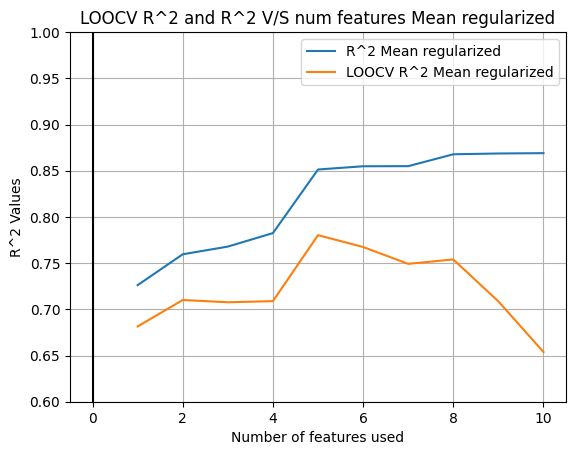

In [15]:
k_lst = [i for i in range(1, 11)]
training_r2 = []
loocv_r2 = []

for k in k_lst:
    # Initialize in the data from the .csv file.
    car = Car_class("cars.csv", LINEAR_REGRESSION, k)

    # Scale the features to run GD.
    car.scale_features()
    # Run the GD.
    cars_theta = car.gradient_descent()
    # car.report_thetas(cars_theta)
    estimate_milage = car.resp_prediction(cars_theta)

    # Run LOOCV
    est_milage_LOO = LOOCV(car)

    # Save the R^2's in list to plot.
    training_r2.append(car.calc_r_squared())
    loocv_r2.append(car.calc_r_squared(est_milage_LOO))

plot_r2s(k_lst, training_r2, loocv_r2, "Mean regularized")

---
__Question 5b__. Interpret the plot from 5a.

---

From the plot it is seen that the LOOCV $R^2$'s follow the same trend as the $R^2$'s for features
below ~7. But after 7 features it seems the LOOCV $R^2$ drops, diverging from the $R^2$ line.
From the plot it can be interpreted that adding the features above 7, probably caused the model
to over-fit a lot on the data causing the CV $R^2$'s drastic drop.
And based on the plots 5 features seems to be the sweet spot where the CV $R^2$ is at it's peak
meaning the at 5 features the model is quite good and not over-fitting a lot either.

---
__Question 5c__. For λ = 0.1, 0.2, . . . , 10, learn a multiple linear hypothesis to predict the car mileage based on all the
mean normalized features and with the regularization parameter λ. For each learning task, calculate the
training R2 and the leave-one-out cross-validation R2. In a single plot show how these two R2 change
as k increases. Interpret your results.

---

In [16]:
# To run the question fairly faster, used Normal Equations method instead of GDA.
car_regularized = Car_class("cars.csv", LINEAR_REGRESSION)

# Scale the features to run GD.
car_regularized.scale_features()
ridge_param_lst = [_ / 10 for _ in range(0, 101)]
training_r2 = []
loocv_r2 = []

# Get the 0-10, step 0.1 list of rigid param.
for regularization_param in ridge_param_lst:
    # Run the GD, and save the thetas.
    theta = car_regularized.normal_equation(lambda_param=regularization_param)
    estimate_milage = car_regularized.resp_prediction(theta)

    # Run LOOCVNE: LOOCV normal equation version.
    est_milage_LOO = LOOCVNE(car_regularized, lambda_parameter=regularization_param)

    # Save the R^2's in list to plot.
    training_r2.append(car_regularized.calc_r_squared())
    loocv_r2.append(car_regularized.calc_r_squared(est_milage_LOO))

plot_r2s(ridge_param_lst, training_r2, loocv_r2, "Regularized", xlbl='Rigid Parameter', ylimit=(0.65, 0.90))

---
__Question 5d__. Interpret the plot from 5c.

---

From the plot it seems the LOOCV $R^2$ increases up till $\lambda \approx 5$ and then the change
from there on out is slow. While the $R^2$'s decreases throughout but the rate is much less.
From this it can be inferred that increasing the $\lambda$ doesn't affect the model accuracy on
the given data much but on the test data the difference is significant for small values of
$\lambda$ (for bigger values effect decreases)
From the plot it is seen that picking a smaller $\lambda$ is better as the most change occurs
for lower values at the start.
